In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
%matplotlib inline

# Load data

In [2]:
df = pd.read_json('pizza_data.json', orient='values')

In [3]:
print(len(df))
df.head()

4040


,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091


# Balance in users which received pizza or not

In [4]:
df['requester_received_pizza'].value_counts()

False    3046
True      994
Name: requester_received_pizza, dtype: int64

<AxesSubplot:>

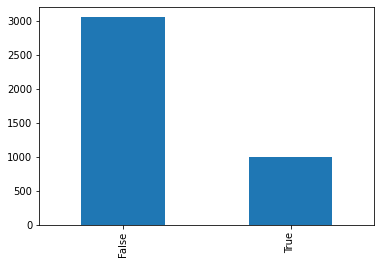

In [5]:
df['requester_received_pizza'].value_counts().plot(kind='bar')

# Metadata

### Reputation of the requester
Maybe if a member is more active they have more chances of getting a pizza

In [ ]:
df['requester_number_of_posts_on_raop_at_request'].value_counts()

In [ ]:
df['requester_username'].value_counts().loc[lambda x : x>1] 

This means each requester has made only one request

In [ ]:
df['requester_user_flair'].value_counts(dropna=False)

  `requester_user_flair`: Users on RAOP receive badges (Reddit calls them flairs) which is a small picture next to their username. In our data set the user flair is either None (neither given nor received pizza, N=4282), "shroom" (received pizza, but not given, N=1306), or "PIF" (given after received, N=83).
  
  -> these numbers confirm that these badges are attributed after user received the pizza

## Relevant information

Which columns can actually help in predicting ?

**Things which do not help**
* Unique infos : requester_username, request_id
* Infos after the gift : giver_username_if_known, requester_user_flair
* Things probably not relevant or related to raop : post_was_edited, requester_account_age_in_days, requester_days, requester_number_of_comments, requester_number_of_posts, requester_upvotes_plus_downvotes, listr of subreddits names
* Things which are obviously correlated to other column: requester_text_edit_aware, unix_timestamp_of_request_utc

## Find correlated variables
Using Pearson correlation coefficient and p-value, on the rema

In [ ]:
data = df[["number_of_downvotes_of_request_at_retrieval",
          "number_of_upvotes_of_request_at_retrieval",
           "requester_number_of_comments_in_raop_at_request",
           "requester_number_of_comments_in_raop_at_retrieval",
           "requester_number_of_posts_on_raop_at_request",
           "requester_number_of_posts_on_raop_at_retrieval",
           "requester_number_of_subreddits_at_request",
           "requester_upvotes_minus_downvotes_at_request",
           "requester_upvotes_minus_downvotes_at_retrieval"
          ]]

In [ ]:
sn.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(data)

### Correlation results

We use the threshold recommended by Evans (1996) : **correlation coeff >= 0.6** to decide that 2 variables are strongly correlated. We consider that the correlation test of 2 variables is valid if the **p-value is < 0.05**.
According to these criteria, the following variables are correlated:
* number_of_downvotes_of_request_at_retrieval and number_of_upvotes_of_request_at_retrieval
* requester_number_of_comments_in_raop_at_request and requester_number_of_comments_in_raop_at_retrieval
* requester_number_of_posts_on_raop_at_request and requester_number_of_posts_on_raop_at_retrieval
* requester_upvotes_minus_downvotes_at_request and requester_upvotes_minus_downvotes_at_retrieval (strong)

however the number of downvotes and upvotes are obviously not correlated so we keep both of them and merge them into one variable : number_of_upvotes_minus_downvotes_of_request

We observe in the reddit channel that donators react quite fast to the comments (usually the same day) while there can be several weeks between request and retrieval. Therefore for a situation closer to what the donator had **we chose to keep the variables "at_request"**.

# Text data

Inspiration from https://towardsdatascience.com/text-classification-in-python-dd95d264c802

### Difference between columns text and text_edit_aware

According to https://cs.stanford.edu/~althoff/raop-dataset/,
`We use a set of rules to strip edited comments indicating the success of the request such as "EDIT: Thanks /u/foo, the pizza was delicous".` 

In [ ]:
dftxt = df[['request_text','request_text_edit_aware']].copy()

dftxt['same_text'] = np.where( dftxt['request_text'] == dftxt['request_text_edit_aware'] , True, False)
dftxt['same_text'].value_counts()

In [ ]:
dftxt[dftxt['same_text']==False]

In [ ]:
dftxt[dftxt['request_text_edit_aware']=='*']

### Conclusion:
I manually checked a few of the texts where request_text and request_text_edit_aware are not the same, a lot of times the EDIT from request_text is not about thanking a donator, it is more about adding some new contextual information which might have convinced the people to give them a pizza.
Therefore **we prefer to use request_text** and discard column request_text_edit_aware.

## Clean text

In [ ]:
%%capture
!pip install nltk

In [ ]:
"""
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')"""

In [6]:
txt = "[Request] College student, pay check delayed for a week, all out of food pantry food, and haven't eaten today"

In [7]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

punctuation = list(",.?!(){}[]-_\"'\\;:+*<>@#§^$%&|/") + ['\n', '\r', '\t', '...', '..']
stop_words = set(stopwords.words('english'))
stop_words.add("request")
stop_words.add("edit")

lemmatizer = WordNetLemmatizer()
tag_dict = {"J": wn.ADJ,
            "N": wn.NOUN,
            "V": wn.VERB,
            "R": wn.ADV}

def extract_wnpostag_from_postag(tag):
    #take the first letter of the tag
    #the second parameter is an "optional" in case of missing key in the dictionary 
    return tag_dict.get(tag[0].upper(), None)

def lemmatize_tupla_word_postag(tupla):
    """
    giving a tupla of the form (wordString, posTagString) like ('guitar', 'NN'), return the lemmatized word
    """
    tag = extract_wnpostag_from_postag(tupla[1])    
    return lemmatizer.lemmatize(tupla[0], tag) if tag is not None else tupla[0]

def correspondance_miswrite(word):
    if word == "im":
        return "i'm"
    elif word == "ive":
        return "i've"

def clean_text(sentence):
    sentence = sentence.lower()
    original_words = word_tokenize(sentence)
    tagged_words = nltk.pos_tag(original_words) #returns a list of tuples: (word, tagString) like ('And', 'CC')
    lemmatized_words = [ lemmatize_tupla_word_postag(ow) for ow in tagged_words ]
    cleaned_words = [ 
        w for w in lemmatized_words if (w not in punctuation) and (w not in stop_words)
    ]
    cleaned_words = [ correspondance_miswrite(w) for w in cleaned_words ]
    return ' '.join(cleaned_words)

In [8]:
clean_text(txt)

"college student pay check delay week food pantry food n't eat today"

## Text length

In [ ]:
df['len_title'] = df['request_title'].str.len()
df['len_text'] = df['request_text'].str.len()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12.8,6))
sn.histplot(df['len_title']).set_title('Requests title length distribution');

In [ ]:
title_250 = df[df['len_title'] > 250]
print('Num requests with very long title: ', len(title_250))
print('\n Example of a request:')
print('------ Title ----------')
print(title_250['request_title'].iloc[0])
print('------ Text ----------')
print(title_250['request_text'].iloc[0])

In [ ]:
plt.figure(figsize=(12.8,6))
sn.boxplot(data=df, x='requester_received_pizza', y='len_title');

In [ ]:
plt.figure(figsize=(12.8,6))
sn.histplot(df['len_text']).set_title('Requests text length distribution');

In [ ]:
df['len_text'].describe()

In [ ]:
plt.figure(figsize=(12.8,6))
df_95 = df[df['len_text'] < df['len_text'].quantile(0.95)]
sn.histplot(df_95['len_text']).set_title('Requests text length distribution')

In [ ]:
plt.figure(figsize=(12.8,6))
sn.boxplot(data=df_95, x='requester_received_pizza', y='len_text');

## Text data reduction

In [9]:
def clean_col(row, col):
    return clean_text(row[col])

df['cleaned_title'] = df.apply(lambda x: clean_col(x, 'request_title'), axis =1)
df['cleaned_text'] = df.apply(lambda x: clean_col(x, 'request_text'), axis =1)

In [10]:
df[['cleaned_title', 'cleaned_text', 'requester_received_pizza']]

,cleaned_title,cleaned_text,requester_received_pizza
0,colorado spring help us please,hi need food 4 child military family really hi...,False
1,california cash could use dinner,spend last money gas today im break next thursday,False
2,hungry couple dundee scotland would love pizza,girlfriend decide would good idea get perth bu...,False
3,canada ontario get home school need pizza,'s cold i'n hungry completely honest 'm broke ...,False
4,old friend come visit would love fee dinner in...,hey guy love sub think 's great except sob sto...,False
...,...,...,...
4035,anyone help recent college grad start new job/...,anyone kind enough help start new job monday d...,False
4036,usa papa john give away one free pizza 15 purc...,someone could hook 15 gift card would happily ...,True
4037,mi usa day would love pizza lunch,today soo 'll stick house day clean homework '...,False
4038,nashua nh mother one hungry 2 year old,'ve never anything like willing try proud moth...,False


# Prepare data

## Text only

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False, max_features=50)

min_df = 10
max_df = 1.
max_features = 200

In [64]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df['cleaned_text']), 
                                                    np.array(df['requester_received_pizza']).astype(int), 
                                                    test_size=0.20, 
                                                    random_state=8)



In [65]:
print(X_train[:10])
print(X_test[:10])
print(y_train[:10])

["get pay end month final week always struggle could ration pizza pizza 'm willing return favor take funny picture involve cat pizza"
 'parent visit uncle vermont service provide money order dinner night university id steal since dont money cant get new one pizza would help get weekend get new one please help'
 "check history 'll see last three week credit card skim car window bust stitch put back without insurance etc etc today get electric bill 320 dollar 17 year old thermostat decide 'd cool run ac heat time work part time non-profit n't pay much everything 's happen tap couple month pizza probably last three day leftover goodness 've make noodle rice food bank past week 'm hungry hate scammer intend pay forward problem use verification code/pming address/sending printscreen adorable graph bill quadrupling/etc thank friends"
 "'m 21 year old boston college student bank account overdraw monday 've live ramen noodle old brownie make last week pizza would really help get weekend pay fo

In [66]:
vectorizer = TfidfVectorizer(stop_words=None,
                        lowercase=False,
                        max_features=1000)
                        
features_train = vectorizer.fit_transform(X_train).toarray()
labels_train = y_train
print('Train features:', features_train.shape)
features_test = vectorizer.transform(X_test).toarray()
labels_test = y_test
print('Test features:', features_test.shape)
print('Identified words:')
features_names = vectorizer.get_feature_names_out()
print(features_names.shape)

Train features: (3232, 1000)
Test features: (808, 1000)
Identified words:
(1000,)


In [67]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': False,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [68]:
print(features_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.2846478  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [69]:
X_1 = features_train[labels_train].sum(axis=0)
X_0 = features_train[np.logical_not(labels_train)].sum(axis=0)
top_true = np.argsort(X_1)[-10:]
print("Top true words:\n. {}".format('\n. '.join(np.array(features_names)[top_true])))
top_false = np.argsort(X_0)[-10:]
print("Top false words:\n. {}".format('\n. '.join(np.array(features_names)[top_false])))


Top true words:
. willing
. end
. favor
. picture
. always
. pizza
. final
. cat
. struggle
. involve
Top false words:
. work
. money
. food
. go
. really
. help
. pay
. get
. would
. pizza


In [71]:
for i in range(2):
    features_chi2 = chi2(features_train, labels_train == i)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(features_names)[indices]
    print("# Requester received Pizza {}:".format(bool(i)))
    print("Most discriminating words words:\n. {}".format('\n. '.join(feature_names[-10:])))
    print("")

# Requester received Pizza False:
Most correlated words:
. http
. com
. fulfil
. landlord
. check
. sunday
. surprise
. rice
. jpg
. imgur

# Requester received Pizza True:
Most correlated words:
. http
. com
. fulfil
. landlord
. check
. sunday
. surprise
. rice
. jpg
. imgur



In [72]:
import pickle

# X_train
with open('pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('pickles/df.pickle', 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open('pickles/features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('pickles/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('pickles/features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('pickles/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)

# labels_test
with open('pickles/vectorizer.pickle', 'wb') as output:
    pickle.dump(vectorizer, output)
